# **EURO DOLLAR CON MAPA DE CALOR**

In [151]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/ejemplos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Matplotlib')) + "/"

In [152]:
import pandas as pd


filename = data_dir + "euro-dollar-clean.csv"
df = pd.read_csv(filename,usecols=['year','month','dollar'])
df

,year,month,dollar
0,2021,9,1.1711
1,2021,9,1.1780
2,2021,9,1.1763
3,2021,9,1.1824
4,2021,9,1.1814
...,...,...,...
3004,2010,1,1.4304
3005,2010,1,1.4350
3006,2010,1,1.4442
3007,2010,1,1.4389


In [153]:
df=df.dropna()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    3009 non-null   int64  
 1   month   3009 non-null   int64  
 2   dollar  3009 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 70.6 KB


,year,month,dollar
count,3009.000000,3009.000000,3009.000000
mean,2015.350282,6.426720,1.217403
std,3.392674,3.407404,0.127147
min,2010.000000,1.000000,0.000000
25%,2012.000000,3.000000,1.123000
50%,2015.000000,6.000000,1.193300
75%,2018.000000,9.000000,1.317800
max,2021.000000,12.000000,1.488200


In [154]:
df_gpr=df.groupby(['year','month']).mean()

In [155]:
df_gpr=df_gpr.unstack()

In [156]:
df_gpr

dollar                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2010   1.359248  1.368570  1.356852  1.218700  1.256533  1.220850  1.277000   
2011   1.335967  1.364895  1.399917  1.306638  1.434864  1.438841  1.426429   
2012   1.290486  1.322410  1.320100  1.190824  1.223287  1.252629  1.228845   
2013   1.328805  1.335905  1.296360  1.302600  1.298205  1.318875  1.308013   
2014   1.361023  1.365850  1.382252  1.381250  1.373214  1.359238  1.353917   
2015   1.162133  1.134965  1.083768  1.077930  1.114955  1.121323  1.099578   
2016   1.085965  1.109295  1.109967  1.133919  1.131109  1.122891  1.106852   
2017   1.061441  1.064265  1.068470  1.072267  1.105750  1.122945  1.151114   
2018   1.219950  1.234780  1.233619  1.227630  1.181223  1.167829  1.168573   
2019   1.141641  1.135115  1.130248  1.123825  1.118459  1.129340  1.121839   
2020   1.110036  1.090500  1.106341  1.086190  1.090185  1.125459  1.146339   
2021   1.217085  1.209790  1.189909  1.197910  1.214590  1.204709  1.182182   

                                                         
month        8         9         10        11        12  
year                                                     
2010   1.289418  1.306700  1.389781  1.366095  1.322013  
2011   1.434322  1.377000  1.370633  1.355573  1.258000  
2012   1.239996  1.285570  1.297417  1.282773  1.311937  
2013   1.330950  1.334790  1.363496  1.349290  1.370360  
2014   1.331610  1.290136  1.267274  1.247220  1.233133  
2015   1.113905  1.122118  1.123509  1.073600  1.087718  
2016   1.121174  1.121209  1.102605  1.079895  1.054290  
2017   1.180674  1.191457  1.175586  1.173800  1.183621  
2018   1.154896  1.165870  1.148404  1.136686  1.138421  
2019   1.112623  1.100390  1.105257  1.105095  1.111345  
2020   1.182810  1.179241  1.177518  1.183790  1.216973  
2021   1.177182  1.181693       NaN       NaN       NaN

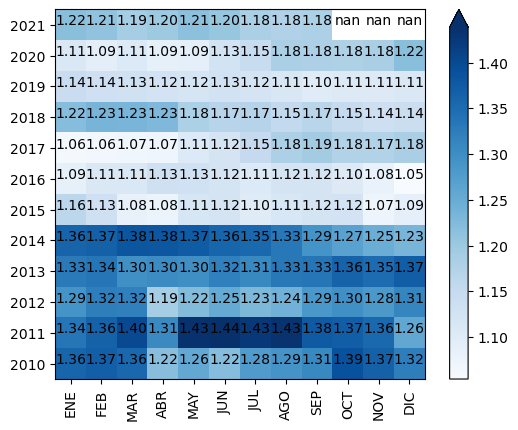

In [162]:
import calendar
import locale
from matplotlib import pyplot as plt


fig,ax = plt.subplots()
im = ax.imshow(df_gpr,cmap="Blues")
cbar = fig.colorbar(im,ax=ax,extend='max')

locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
x = list(map(lambda x: str(calendar.month_abbr[x[1]]).upper().replace(".",""),df_gpr.columns))
y = df_gpr.index

for i in range(len(y)):
  for j in range(len(x)):
    valor = df_gpr.iloc[i,j]
    ax.text(j, i, f"{valor:.2f}",ha="center")

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x,rotation=90)

ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)

ax.invert_yaxis()
